# T-SNE and Reddit

Examples of t-SNE applied to linguistic reddit data followed my code to generate example points and visualizations in explanation of the t-SNE algorithm. 

See also [these slides](https://kchalk.github.io/FinalTsnePres.pptx) introducing the t-SNE algorithm.

As well as [this folder](https://github.com/KChalk/kchalk.github.io/tree/master/jupyter) for the jupyter notebook and data files which generated this page.

In [1]:
# Imports and Definitions

from sklearn.manifold import TSNE
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_notebook, show
from bokeh.models import CategoricalColorMapper
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label
from bokeh.palettes import d3

output_notebook()


Loading BokehJS ...

In [2]:
# Map subnames to braoder categories
cat_to_sub={
        'gaming':set(['leagueoflegends', 'gaming', 'DestinyTheGame', 'DotA2', 'ContestofChampions', 'StarWarsBattlefront', 'Overwatch', 'WWII', 'hearthstone', 'wow', 'heroesofthestorm', 'destiny2', 'darksouls3', 'fallout']),
        'mental_health':set(['SuicideWatch', 'depression', 'OCD', 'dpdr', 'proED', 'Anxiety', 'BPD', 'socialanxiety', 'mentalhealth', 'ADHD', 'bipolar']),
        'computers':set(['buildapc', 'techsupport', 'buildapcforme', 'hacker', 'SuggestALaptop', 'hardwareswap', 'laptops', 'computers', 'pcmasterrace']),
        'relationships':set(['relationshps', 'relationship_advice', 'breakups', 'dating_advice', 'LongDistance', 'polyamory', 'wemetonline']),
        'drugs':set(['MDMA', 'Drugs', 'trees', 'opiates', 'LSD']),
        'general':set([ 'tifu', 'r4r', 'AskReddit', 'reddit.com', 'tipofmytongue', 'Life', 'Advice', 'jobs', 'teenagers', 'HomeImprovement', 'redditinreddit']),
        'sports':set(['FIFA', 'nba', 'hockey', 'nfl', 'mls', 'baseball']),
        'media':set(['BokuNoHeroAcademia', 'anime', 'movies', 'StrangerThings'])
}
dictionary=cat_to_sub

sub_to_cat={}
for cat, subs in cat_to_sub.items():
    for s in subs:
        sub_to_cat[s]= cat

In [3]:
full_filename='../Spark/collection_frequencies.csv'
small_filename='collection_frequencies.csv'

def reset_input(filename):
    med=pd.read_csv(filename)
    med=med[med.subreddit.ne('subreddit')].dropna()
    med['i']=med.index.to_series().apply(lambda x: (med.loc[x,'subreddit'],med.loc[x,'month']))
    med=med.set_index('i')
    med_nums=med.iloc[:,2:-1]
    med_norm=norm.transform(med_nums.T).T
    return med, med_nums, med_norm

## Smallest Dataset


In [4]:
np.random.seed(1)

norm = Normalizer()
pca = PCA(n_components=30)
model=TSNE(n_iter=2000, perplexity=5.0)


small_r, small_r_nums, small_r_norm = reset_input(small_filename)
small_r_pca=pca.fit_transform(small_r_norm)

twod=model.fit_transform(small_r_pca)

small_r['Tsne1']=twod[:,0]
small_r['Tsne2']=twod[:,1]
small_r['category']=small_r.subreddit.apply(lambda x: sub_to_cat[x])

print('Reveal this code block to see the preprocessing and t-SNE code for this dataset')

#Or, feel free to message me about what I could have done better to actually hide this code

Reveal this code block to see the preprocessing and t-SNE code for this dataset


In [5]:
small_r.head(10)

,subreddit,month,count(1),sum(wordcount),absolutist_freq,funct_freq,pronoun_freq,i_freq,we_freq,you_freq,...,home_freq,money_freq,relig_freq,death_freq,assent_freq,nonfl_freq,filler_freq,Tsne1,Tsne2,category
i,,,,,,,,,,,,,,,,,,,,,
"(buildapc, 16-12)",buildapc,16-12,11394,2670024,0.005858748835216462,0.4225051909645756,0.11574839776721108,0.053445961534428155,0.0013104751118342007,0.01522795300716398,...,0.0014790129227302826,0.011878919440424506,4.1797377102228294E-4,2.8089635149346974E-4,0.0036336752029195243,8.052362076146132E-4,0.0026561558997222497,-147.540161,49.934986,computers
"(mentalhealth, 16-12)",mentalhealth,16-12,442,145483,0.013726689716324243,0.6269942192558581,0.21192854147907317,0.11441886680918045,0.0037667631269632878,0.0050933786078098476,...,0.004048582995951417,0.002646357306351945,7.904703642349965E-4,0.0013403627915289072,0.001058542922540778,0.0010860375439054736,0.0062619000158094075,190.499847,-145.644958,mental_health
"(DestinyTheGame, 16-12)",DestinyTheGame,16-12,1455,460088,0.011289144685364539,0.5269904887760603,0.12380240301855297,0.03517370589974092,0.006753055937125072,0.018155222479177897,...,0.0014823251204117472,0.003573229469145033,0.0014866721148997584,0.0032146024238841266,0.001754012275912434,0.0011584740310549286,0.0033732677226965277,-15.350249,147.387512,gaming
"(buildapcforme, 16-12)",buildapcforme,16-12,1271,458336,0.0037134329400265306,0.5228391398450045,0.12008221043077567,0.026332210430775674,0.0035519793339384206,0.05030370732388466,...,0.0037876143266075543,0.015161366333868604,5.23633317042519E-4,1.985442993786218E-4,0.004679972771067514,5.476331774069679E-4,0.005799238986245898,-289.262390,43.901253,computers
"(opiates, 16-12)",opiates,16-12,800,208320,0.012864823348694316,0.595526113671275,0.17950748847926268,0.08860887096774193,0.004123463901689708,0.010973502304147465,...,0.005088325652841782,0.006149193548387097,0.0016801075268817205,0.0012192780337941629,0.002491359447004608,0.0016897081413210445,0.004560291858678955,73.852013,-235.847214,drugs
"(proED, 16-12)",proED,16-12,439,96588,0.01443243467097362,0.6190624094090363,0.20788296682817742,0.12564707831200564,0.0024019546941649065,0.006698554685882304,...,0.0034786930053422784,0.00271255228392761,0.0018842920445604008,5.694289145649563E-4,0.0024951339710937177,0.0011595643351140928,0.006201598542261978,86.838821,-165.386108,mental_health
"(wow, 16-12)",wow,16-12,1522,336830,0.01135884570851765,0.571243654068818,0.14879909746756523,0.05916931389721818,0.006884778671733515,0.01284030519846807,...,0.0012469198111807144,0.004310779918653327,0.0024700887688151292,0.0017872517293590238,0.0019980405545824303,0.0011459786836089422,0.004485942463557284,-48.052700,181.579590,gaming
"(r4r, 16-12)",r4r,16-12,1692,396283,0.009962577249087142,0.5959604625986984,0.19473204755187581,0.10451874039512167,0.006783031318527416,0.019566824718698507,...,0.0024906443122717854,0.003553016404942932,0.0011607866095694238,6.40956084414421E-4,0.0032148742186770564,0.0019102510074870736,0.00745679224190793,-67.443962,221.125809,general
"(DotA2, 16-12)",DotA2,16-12,2553,644136,0.010853298061278984,0.5244839599090875,0.12707564862078816,0.035922538097544615,0.005118484295241999,0.015473440391470125,...,5.138666368592968E-4,0.0053544593067302556,0.0017946520610554293,0.001743420644087584,0.0017170287020132394,0.001032390675261125,0.004199423724182471,-66.375130,135.386505,gaming


In [6]:
print('This dataset includes', len(small_r.month.unique()), 'month(s) of data from', len(small_r.subreddit.unique()), 'subreddits.')
print('\nThese data include the frequencty of words from', small_r_nums.shape[1]-2, 'word collections in each month of posts to each subreddit, \nas well as the total number of posts in that month and the total word count in those posts.')
print('\nThe names of these word collections are:'),

cols=small_r.columns[4:-3]
for i in range(0,len(cols),4):
    print('\t',cols[i][:-5],' ',cols[i+1][:-5],' ',cols[i+2][:-5],' ',cols[i+3][:-5])

This dataset includes 1 month(s) of data from 51 subreddits.

These data include the frequencty of words from 55 word collections in each month of posts to each subreddit, 
as well as the total number of posts in that month and the total word count in those posts.

The names of these word collections are:
	 absolutist   funct   pronoun   i
	 we   you   shehe   they
	 article   verb   auxverb   past
	 present   future   adverb   preps
	 conjunctions   negate   quant   number
	 swear   social   family   friend
	 humans   affect   posemo   negemo
	 anx   anger   sad   cogmech
	 insight   cause   discrep   tentat
	 certain   inhib   percept   bio
	 body   ingest   relativ   motion
	 space   time   work   achieve
	 leisure   home   money   relig
	 death   assent   nonfl   filler


### One Month Visual

The following visualization is a scatter plot showing one month of data in which each point represents the t-SNE dimensionality reduction of numerical features representing one subreddit. The name of the subreddit associated with each point can be seen by hovering over the data point

Of note is the way, points representing each subreddit cluster with each other, with the exception of the 'general' category which includes the following, largely unrelated subreddits:
    - tifu  (today I fucked up) 
    - r4r
    - AskReddit
    - reddit.com
    - tipofmytongue (in which people describe words they are searching for but can't remember)
    - Life
    - Advice
    - jobs
    - teenagers
    - HomeImprovement
    - redditinreddit

Also of interest is the way category clusters also form two larger groups, one containing the computers, video game, and sports categories and the other including forums about relationships, mental health, and drugs. 

In [7]:
data=small_r
palette = d3['Category10'][len(data['category'].unique())]
color_map = CategoricalColorMapper(factors=data['category'].unique(), palette=palette)

source = ColumnDataSource(data)

TOOLTIPS = [
    ("subreddit", "@subreddit"),
    ("category", "@category"),
    ("index", "@i"),

]

p_small=figure(x_axis_label='Tsne 1',y_axis_label='Tsne 2',tooltips=TOOLTIPS)
p_small.circle(x='Tsne1', y='Tsne2',
         color={'field': 'category', 'transform': color_map}, 
         legend='category',
         source=source,
         size=10)

p_small.legend.click_policy="hide"

print('Reveal this code block for bokeh visualization code')

Reveal this code block for bokeh visualization code


In [8]:
show(p_small)

## Big Reddit Data


In [9]:
reload=False
if reload:
    np.random.seed(1)
    reset_input(full_filename)

    norm = Normalizer()
    pca = PCA(n_components=30)
    model=TSNE(n_iter=3000, perplexity=55.0)

    data, data_nums, data_norm = reset_input(full_filename)
    data_pca=pca.fit_transform(data_norm)

    twod=model.fit_transform(data_pca)

    data['Tsne1']=twod[:,0]
    data['Tsne2']=twod[:,1]
    data['category']=data.subreddit.apply(lambda x: sub_to_cat[x])

    vis_data=data.loc[:,['subreddit','month','Tsne1','Tsne2','category','count(1)']]
    vis_data.to_csv('vis_data_cache.csv')
    
print('Reveal this code block to see the preprocessing and t-SNE code for this dataset')

Reveal this code block to see the preprocessing and t-SNE code for this dataset


In [10]:
big_r=pd.read_csv('vis_data_cache.csv')
big_r.head(10)

,i,subreddit,month,Tsne1,Tsne2,category,count(1)
0,"('mentalhealth', '15-11')",mentalhealth,15-11,35.442670,-41.172127,mental_health,279
1,"('buildapc', '16-12')",buildapc,16-12,-31.161697,4.441895,computers,11394
2,"('relationship_advice', '15-12')",relationship_advice,15-12,52.036568,42.083908,relationships,2282
3,"('trees', '16-11')",trees,16-11,-42.680676,39.775772,drugs,1408
4,"('hardwareswap', '16-01')",hardwareswap,16-01,-46.412006,16.485046,computers,938
5,"('buildapcforme', '15-06')",buildapcforme,15-06,57.582960,-0.978246,computers,2747
6,"('Overwatch', '15-07')",Overwatch,15-07,-5.354017,-8.762697,gaming,123
7,"('mentalhealth', '16-04')",mentalhealth,16-04,37.051860,-40.462860,mental_health,261
8,"('bipolar', '13-06')",bipolar,13-06,32.023180,-44.671570,mental_health,253
9,"('Drugs', '12-10')",Drugs,12-10,-20.675976,40.302505,drugs,715


In [11]:
print('This dataset includes', len(big_r.month.unique()), 'month(s) of data from', len(big_r.subreddit.unique()), 'subreddits.')
print('\nThese data include the frequencty of words from', small_r_nums.shape[1]-2, 'word collections in each month of posts to each subreddit, \nas well as the total number of posts in that month and the total word count in those posts.')

print('\nIn total this data represents', sum(big_r.iloc[:,-1]), 'text posts.')


This dataset includes 70 month(s) of data from 57 subreddits.

These data include the frequencty of words from 55 word collections in each month of posts to each subreddit, 
as well as the total number of posts in that month and the total word count in those posts.

In total this data represents 4733344 text posts.


### Five Year Visual

The following visualization is a scatter plot representing 5 years of data in which each point represents the t-SNE dimensionality reduction of numerical features representing one month of text posted to one subreddit. The name of the subreddit and the month represented can be seen by hovering over any data point. Note also that the bokeh toolbar to the right of the image should allow zooming. 

While the categories are not so clearly delineated in this image as they are in the visualization of just one month of data (likely because the t-SNE algorithm struggles to represent global relations between so many points), relationships between months of data from the same subreddit are shockingly close. This suggests that each forum has its own linguistic habits that continue across time. 


In [12]:
data=big_r
palette = d3['Category10'][len(data['category'].unique())]
color_map = CategoricalColorMapper(factors=data['category'].unique(), palette=palette)

source = ColumnDataSource(data)

TOOLTIPS = [
    ("index", "@i"),

]

p_big=figure(x_axis_label='Tsne 1',y_axis_label='Tsne 2',plot_width=800, plot_height=800,tooltips=TOOLTIPS)
p_big.cross(x='Tsne1', y='Tsne2',
         color={'field': 'category', 'transform': color_map}, 
         legend='category',
         source=source,
         size=7)
print('Reveal this code block for bokeh visualization code')

Reveal this code block for bokeh visualization code


In [13]:
show(p_big)

### Big reddit data, without metadata

One wonders if the primary reason subreddits can be so easily clustered might be their consistent number of posts and total words across months. Below I've replicated the efforts above, removing the post and word count metadata, and the results show a similarly clustered dataset.

In [14]:
def reset_input_no_meta(filename):
    med=pd.read_csv(filename)
    med=med[med.subreddit.ne('subreddit')].dropna()
    med['i']=med.index.to_series().apply(lambda x: (med.loc[x,'subreddit'],med.loc[x,'month']))
    med=med.set_index('i')
    med_nums=med.iloc[:,4:-1]
    med_norm=norm.transform(med_nums.T).T
    return med, med_nums, med_norm

reload=False
if reload:
    np.random.seed(1)
    reset_input(full_filename)

    norm = Normalizer()
    pca = PCA(n_components=30)
    model=TSNE(n_iter=3000, perplexity=55.0)

    big_r_2, big_r_2_nums, big_r_2_norm = reset_input_no_meta(full_filename)
    big_r_2_pca=pca.fit_transform(data_norm)

    twod=model.fit_transform(data_pca)

    big_r_2['Tsne1']=twod[:,0]
    big_r_2['Tsne2']=twod[:,1]
    big_r_2['category']=big_r_2.subreddit.apply(lambda x: sub_to_cat[x])

    vis_data=big_r_2.loc[:,['subreddit','month','Tsne1','Tsne2','category','count(1)']]
    vis_data.to_csv('vis_data_cache_2.csv')

else:
    big_r_2=pd.read_csv('vis_data_cache_2.csv')

In [15]:
data=big_r_2
palette = d3['Category10'][len(data['category'].unique())]
color_map = CategoricalColorMapper(factors=data['category'].unique(), palette=palette)

source = ColumnDataSource(data)

TOOLTIPS = [
    ("index", "@i"),

]

p_big_2=figure(x_axis_label='Tsne 1',y_axis_label='Tsne 2',plot_width=800, plot_height=800,tooltips=TOOLTIPS)
p_big_2.cross(x='Tsne1', y='Tsne2',
         color={'field': 'category', 'transform': color_map}, 
         legend='category',
         source=source,
         size=7)

print('Reveal this code block for bokeh visualization code')

Reveal this code block for bokeh visualization code


In [16]:
show(p_big_2)

## Random points of illustration

The following hidden code blocks generate the example data used in my presentation introducing the t-SNE algorithm  https://kchalk.github.io/FinalTsnePres.pptx

In [17]:
np.random.seed(1)

rand_data=pd.DataFrame()

a_x =np.random.normal(loc=5, size=10)
a_y =np.random.normal(loc=0, size=10)
a_z =np.random.normal(loc=0, size=10) 
rand_a=pd.DataFrame({'x':a_x, 'y': a_y, 'z':a_z, 'group':'a (5,0,0)'})
rand_data=rand_data.append(rand_a)

b_x =np.random.normal(loc=5, size=10)
b_y =np.random.normal(loc=5, size=10)
b_z =np.random.normal(loc=0, size=10)
rand_b=pd.DataFrame({'x':b_x, 'y': b_y, 'z':b_z, 'group':'b (5,5,0)'})
rand_data=rand_data.append(rand_b)

c_x =np.random.normal(loc=0, size=10) 
c_y =np.random.normal(loc=5, size=10)
c_z =np.random.normal(loc=0, size=10)
rand_c=pd.DataFrame({'x':c_x, 'y': c_y, 'z':c_z, 'group':'c (0,5,0)'})
rand_data=rand_data.append(rand_c)

d_x =np.random.normal(loc=0, size=10)
d_y =np.random.normal(loc=5, size=10)
d_z =np.random.normal(loc=5, size=10)
rand_d=pd.DataFrame({'x':d_x, 'y': d_y, 'z':d_z, 'group':'d (0,5,5)'})
rand_data=rand_data.append(rand_d)


e_x =np.random.normal(loc=5, size=10)
e_y =np.random.normal(loc=5, size=10)
e_z =np.random.normal(loc=5, size=10)
rand_e=pd.DataFrame({'x':e_x, 'y': e_y, 'z':e_z, 'group':'e (5,5,5)'})
rand_data=rand_data.append(rand_e)


f_x =np.random.normal(loc=5, size=10)
f_y =np.random.normal(loc=0, size=10)
f_z =np.random.normal(loc=5, size=10)
rand_f=pd.DataFrame({'x':f_x, 'y': f_y, 'z':f_z, 'group':'f (5,0,5)'})
rand_data=rand_data.append(rand_f).reset_index(drop=True)

rand_nums=rand_data.iloc[:,:-1]

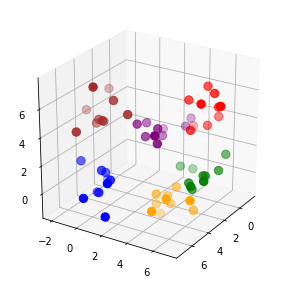

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

ax.view_init(elev=25., azim=32)

ax.scatter(rand_a['x'], 
           rand_a['y'],
           rand_a['z'],
          color='blue',
          s=70)
ax.scatter(rand_b['x'], 
           rand_b['y'],
           rand_b['z'],
          color='orange',
          s=70)
ax.scatter(rand_c['x'], 
           rand_c['y'],
           rand_c['z'],
          color='green',
          s=70)
ax.scatter(rand_d['x'], 
           rand_d['y'],
           rand_d['z'],
          color='red',
          s=70)
ax.scatter(rand_e['x'], 
           rand_e['y'],
           rand_e['z'],
          color='purple',
          s=70)
ax.scatter(rand_f['x'], 
           rand_f['y'],
           rand_f['z'],
          color='brown',
          s=70)

Text(0.5, 1, 'Left Backwards')

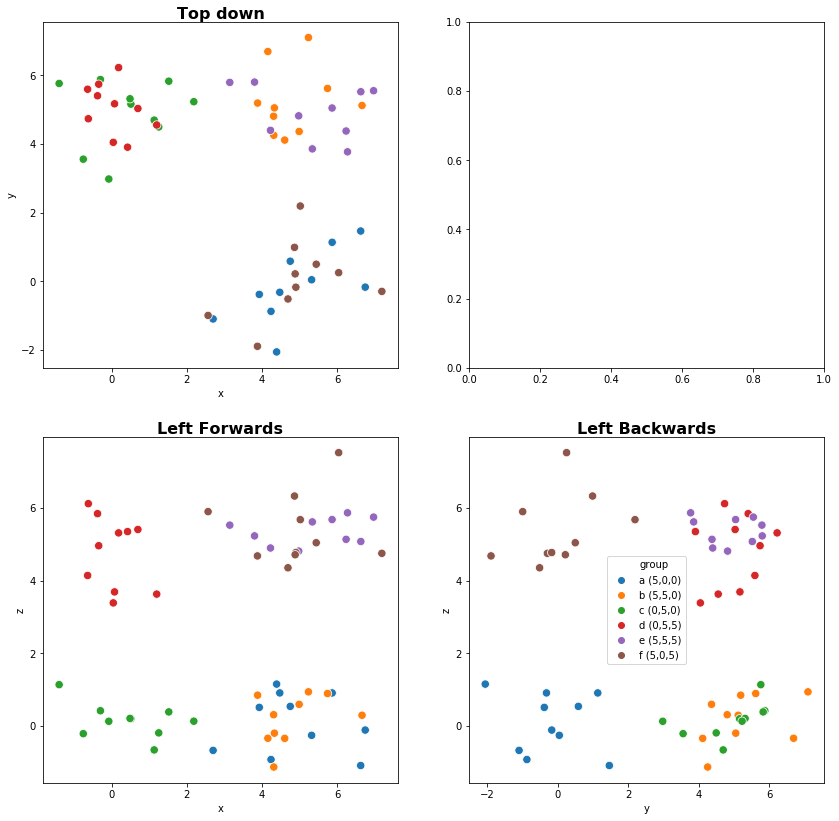

In [19]:
fig, axes = plt.subplots(ncols=2, nrows=2,figsize=(14,14))

axes = axes.flatten()

sns.scatterplot(ax=axes[0],
                x='x', 
                y='y', 
                hue='group', 
                data=rand_data,
               legend=False,
               s=70)
axes[0].text(x=0.5, y=1, s='Top down', fontsize=16, weight='bold', ha='center', va='bottom', transform=axes[0].transAxes)

sns.scatterplot(ax=axes[2],
                x='x', 
                y='z', 
                hue='group', 
                data=rand_data,
               legend=False,
               s=70)
axes[2].text(x=0.5, y=1, s='Left Forwards', fontsize=16, weight='bold', ha='center', va='bottom', transform=axes[2].transAxes)

sns.scatterplot(ax=axes[3],
                x='y', 
                y='z', 
                hue='group', 
                data=rand_data,
               s=70)
axes[3].text(x=0.5, y=1, s='Left Backwards', fontsize=16, weight='bold', ha='center', va='bottom', transform=axes[3].transAxes)


Text(0.5, 1.0, 'p10')

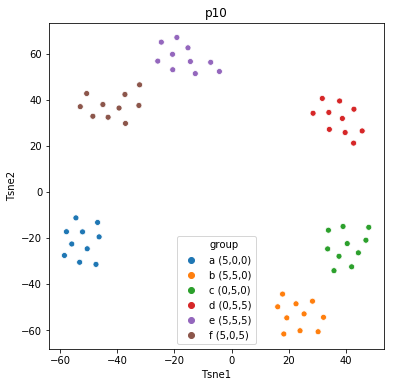

In [20]:
np.random.seed(1)
model=TSNE(n_iter=1000, perplexity=10.0)
twod=model.fit_transform(rand_data.iloc[:,:-1])

rand_data_t=rand_data.copy()
rand_data_t['Tsne1']=twod[:,0]
rand_data_t['Tsne2']=twod[:,1]

fig,ax=plt.subplots(figsize=(6,6))
sns.scatterplot(ax=ax,x='Tsne1', y='Tsne2', hue='group', data=rand_data_t).set_title('p10')

Text(0.5, 1.0, 'p:5')

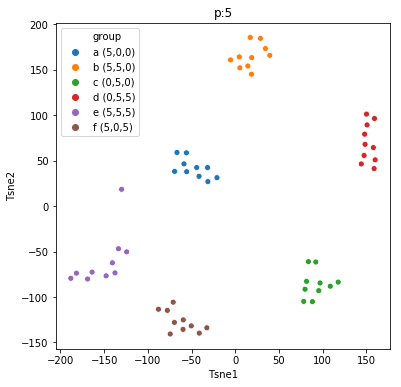

In [21]:
np.random.seed(2)

model=TSNE(n_iter=1000, perplexity=5.0)
twod=model.fit_transform(rand_data.iloc[:,:-1])

rand_data_t=rand_data.copy()
rand_data_t['Tsne1']=twod[:,0]
rand_data_t['Tsne2']=twod[:,1]

fig,ax=plt.subplots(figsize=(6,6))
sns.scatterplot(ax=ax,x='Tsne1', y='Tsne2', hue='group', data=rand_data_t).set_title('p:5')

Text(0.5, 1.0, 'p30')

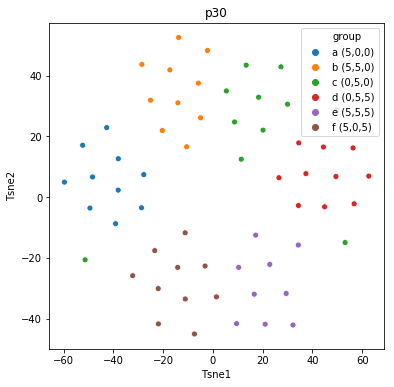

In [22]:
np.random.seed(1)

model=TSNE(n_iter=1000, perplexity=30.0)
twod=model.fit_transform(rand_data.iloc[:,:-1])

rand_data_t=rand_data.copy()
rand_data_t['Tsne1']=twod[:,0]
rand_data_t['Tsne2']=twod[:,1]

fig,ax=plt.subplots(figsize=(6,6))
sns.scatterplot(ax=ax,x='Tsne1', y='Tsne2', hue='group', data=rand_data_t).set_title('p30')

Text(0.5, 1.0, 'p=10')

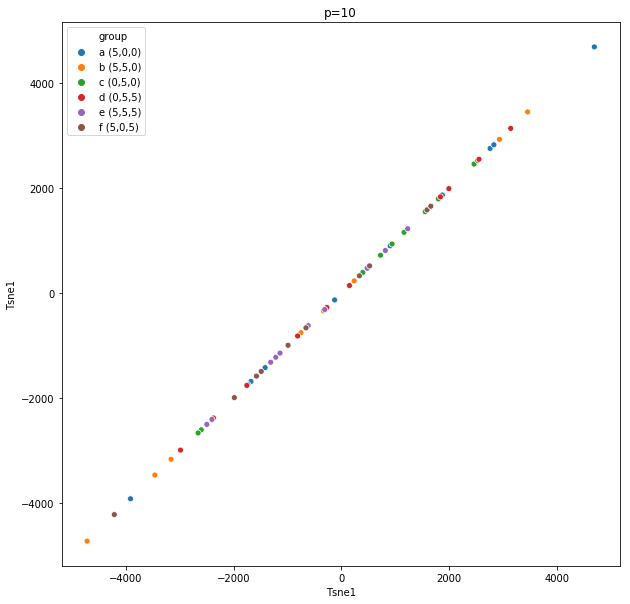

In [23]:
np.random.seed(1)

model=TSNE(n_components=1, n_iter=1000, perplexity=10.0)
twod=model.fit_transform(rand_data.iloc[:,:-1])

rand_data_t=rand_data.copy()
rand_data_t['Tsne1']=twod[:,0]

fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax,x='Tsne1', y='Tsne1', hue='group', data=rand_data_t).set_title('p=10')

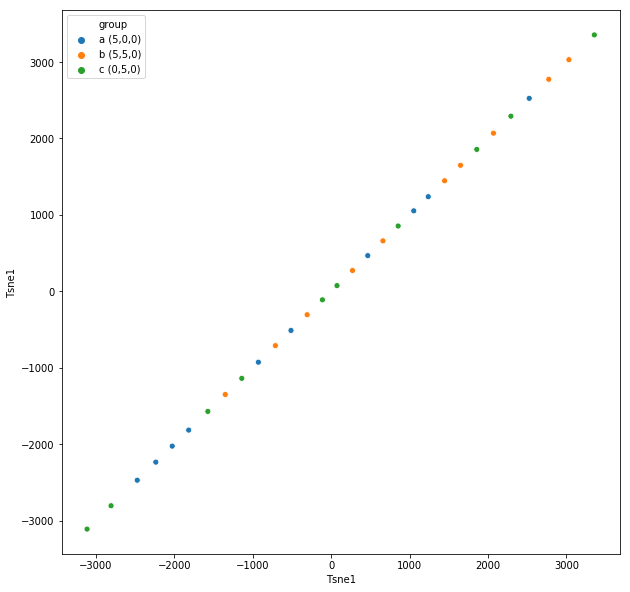

In [24]:
rand_data_t=rand_data.copy()

groups=['a (5,0,0)','b (5,5,0)','c (0,5,0)']
rand_data_t=rand_data_t[rand_data_t.group.isin(groups)].dropna()

model=TSNE(n_components=1, n_iter=1000, perplexity=15.0)
twod=model.fit_transform(rand_data_t.iloc[:,:-1])

rand_data_t['Tsne1']=twod[:,0]

fig,ax=plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax,x='Tsne1', y='Tsne1', hue='group', data=rand_data_t)


### Step by step


In [25]:
rand_data.iloc[:5,:]

,x,y,z,group
0,6.624345,1.462108,-1.100619,"a (5,0,0)"
1,4.388244,-2.060141,1.144724,"a (5,0,0)"
2,4.471828,-0.322417,0.901591,"a (5,0,0)"
3,3.927031,-0.384054,0.502494,"a (5,0,0)"
4,5.865408,1.133769,0.900856,"a (5,0,0)"


In [26]:
rand_nums=rand_data.iloc[:,:-1]
rand_nums.iloc[:5,:]

,x,y,z
0,6.624345,1.462108,-1.100619
1,4.388244,-2.060141,1.144724
2,4.471828,-0.322417,0.901591
3,3.927031,-0.384054,0.502494
4,5.865408,1.133769,0.900856


In [27]:
from sklearn.metrics.pairwise import euclidean_distances

data_euclid=euclidean_distances(rand_nums, rand_nums)


Text(0.5, 1.0, 'Euclidean distance from point a')

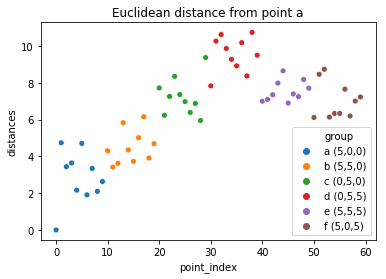

In [28]:
n_points=len(rand_data)
point_a_df=pd.DataFrame({'point_index': rand_data.index,
                         'distances':data_euclid[0,:],
                         'group': rand_data['group']})

sns.scatterplot(x='point_index', y='distances', hue='group', data=point_a_df).set_title('Euclidean distance from point a')

"The similarity of point j to point i is the conditional probabilty p_j|i that x_i would pick x_j as its neighbor if the neighbors were picked in proportaion to their probability density unter a gaussian senteres at x_i." 

p(j|i) = exp(-euclid/2sig^2_i)/normalized

Text(0.5, 1.0, 'Probability neighbor of point a (sigma=.5)')

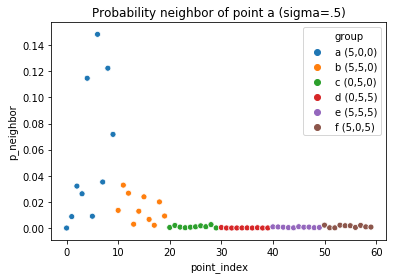

In [29]:
# if sigma is .5... 
point_a_df['p_neighbor']= np.exp(-point_a_df.distances)
point_a_df.iloc[0,-1]= 0

sns.scatterplot(x='point_index', y='p_neighbor', hue='group', data=point_a_df).set_title('Probability neighbor of point a (sigma=.5)')

Text(0.5, 1.0, 'Probability neighbor of point a (sigma=.5)')

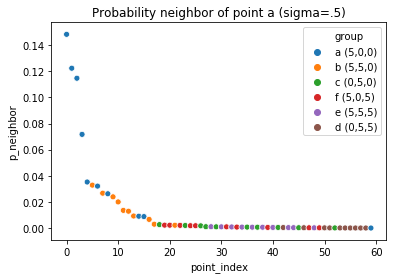

In [30]:
# if sigma is .5... 
point_a_df['p_neighbor']= np.exp(-point_a_df.distances)
point_a_df.iloc[0,-1]= 0

point_a_df_sorted=point_a_df.sort_values('p_neighbor', ascending=False).reset_index()
point_a_df_sorted['point_index']=point_a_df_sorted.index

sns.scatterplot(x='point_index', y='p_neighbor', hue='group', data=point_a_df_sorted).set_title('Probability neighbor of point a (sigma=.5)')

Text(0.5, 1.0, 'Probability neighbor of point a (sigma=1)')

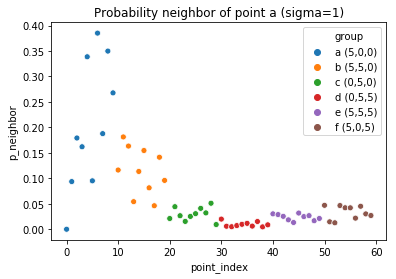

In [31]:
# if sigma is 1... 
point_a_df['p_neighbor']= np.exp(-point_a_df.distances/2)
point_a_df.iloc[0,-1]= 0

sns.scatterplot(x='point_index', y='p_neighbor', hue='group', data=point_a_df).set_title('Probability neighbor of point a (sigma=1)')

Text(0.5, 1.0, 'Probability neighbor of point a (sigma=1)')

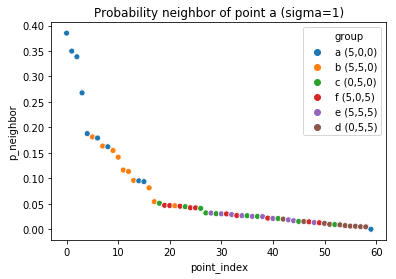

In [32]:
# if sigma is 1... 
point_a_df['p_neighbor']= np.exp(-point_a_df.distances/2)
point_a_df.iloc[0,-1]= 0

point_a_df_sorted=point_a_df.sort_values('p_neighbor', ascending=False).reset_index()
point_a_df_sorted['point_index']=point_a_df_sorted.index

sns.scatterplot(x='point_index', y='p_neighbor', hue='group', data=point_a_df_sorted).set_title('Probability neighbor of point a (sigma=1)')

Text(0.5, 1.0, 'T-dist probability neighbor of point a')

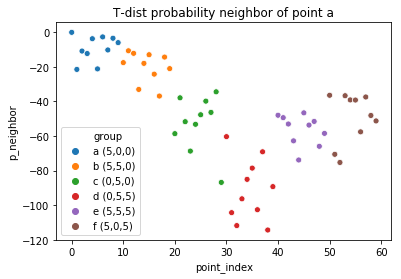

In [33]:
# if sigma is 1... 
point_a_df['p_neighbor']= 1+(-point_a_df.distances**2)
point_a_df.iloc[0,-1]= 0

sns.scatterplot(x='point_index', y='p_neighbor', hue='group', data=point_a_df).set_title('T-dist probability neighbor of point a')

Text(0.5, 1.0, 'T-dist probability neighbor of point a')

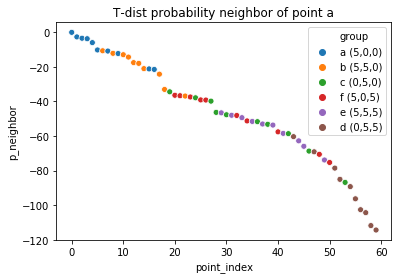

In [34]:
# if sigma is 1... 
point_a_df['p_neighbor']= 1-point_a_df.distances**2
point_a_df.iloc[0,-1]= 0

point_a_df_sorted=point_a_df.sort_values('p_neighbor', ascending=False).reset_index()
point_a_df_sorted['point_index']=point_a_df_sorted.index

sns.scatterplot(x='point_index', y='p_neighbor', hue='group', data=point_a_df_sorted).set_title('T-dist probability neighbor of point a')

Text(0.5, 1.0, 'Euclidean distance from point b')

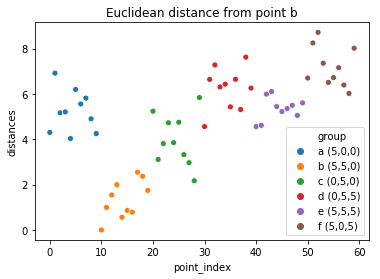

In [35]:
point_b_df=pd.DataFrame({'point_index': rand_data.index,
                         'distances':data_euclid[10,:],
                         'group': rand_data['group']})


sns.scatterplot(x='point_index', y='distances', hue='group', data=point_b_df).set_title('Euclidean distance from point b')

Text(0.5, 1.0, 'Probability neighbor of point b')

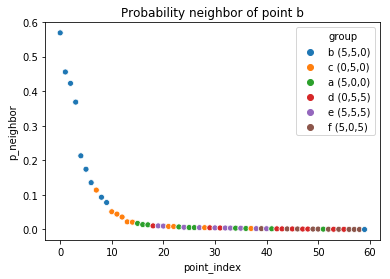

In [36]:
# if sigma is .5... 
point_b_df['p_neighbor']= np.exp(-point_b_df.distances)
point_b_df.iloc[10,-1]= 0

#sns.scatterplot(x='point_index', y='p_neighbor', hue='group', data=point_b_df).set_title('Probability neighbor of point b')

point_b_df_sorted=point_b_df.sort_values('p_neighbor', ascending=False).reset_index()
point_b_df_sorted['point_index']=point_b_df_sorted.index

sns.scatterplot(x='point_index', y='p_neighbor', hue='group', data=point_b_df_sorted).set_title('Probability neighbor of point b')